In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from constants import SPATIAL, MORPHOLOGICAL, TEMPORAL 
from utils.calc_psth import main
from utils.cross_correlation_data import calc_cc

In [2]:
PATH = 'clustersData_no_light/0'

In [3]:
df = None
files = os.listdir(PATH)
sessions = []
for file in sorted(files):
    if df is None:
        df = pd.read_csv(PATH + '/' + file)
    else:
        temp = pd.read_csv(PATH + '/' + file)
        df = df.append(temp)
sessions = ['_'.join(name.split('_')[:-2]) for name in df.name]
df['session'] = sessions        

In [4]:
df.label = df.label.map({1: 'PYR', 0: 'IN', -1: 'UT', -3: 'UT'})
pd.value_counts(df.label)

UT     428
PYR    411
IN     101
Name: label, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 0
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   dep_red                   940 non-null    float64
 1   dep_sd                    940 non-null    float64
 2   graph_avg_speed           940 non-null    float64
 3   graph_slowest_path        940 non-null    float64
 4   graph_fastest_path        940 non-null    float64
 5   geometrical_avg_shift     940 non-null    float64
 6   geometrical_shift_sd      940 non-null    float64
 7   geometrical_max_dist      940 non-null    float64
 8   spatial_dispersion_count  940 non-null    float64
 9   spatial_dispersion_sd     940 non-null    float64
 10  da                        940 non-null    float64
 11  da_sd                     940 non-null    float64
 12  Channels contrast         940 non-null    float64
 13  break_measure             940 non-null    float64
 14  fwhm        

In [6]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df=df[df.label != 'UT']

In [7]:
pd.crosstab(df['session'], df['label'])

label,IN,PYR
session,,
es04feb12_1,2,22
es09feb12_2,3,4
es09feb12_3,3,2
es20may12_1,1,0
es21may12_1,3,0
es25nov11_12,1,14
es25nov11_13,3,8
es25nov11_3,9,13
es25nov11_5,3,8


In [8]:
options = ['es04feb12_1', 'es25nov11_13', 'es25nov11_3', 'es25nov11_5', 'm361r2_17']

In [9]:
pvs = []
pyrs = []
for option in options:
    df_option = df[df.session == option]
    option_pv = df_option[df_option.label == 'IN'].name
    option_pyr = df_option[df_option.label == 'PYR'].name
    pvs.append([n for n in option_pv])
    pyrs.append([n for n in option_pyr])

Skipping ./Data/es25nov11_3\es25nov11_3.stm.sin for missing stim and/or times fields
Skipping ./Data/es25nov11_3\es25nov11_3.stm.sin for missing stim and/or times fields
Skipping ./Data/es25nov11_3\es25nov11_3.stm.sin for missing stim and/or times fields
Skipping ./Data/es25nov11_3\es25nov11_3.stm.sin for missing stim and/or times fields
Skipping ./Data/es25nov11_3\es25nov11_3.stm.sin for missing stim and/or times fields
Skipping ./Data/es25nov11_3\es25nov11_3.stm.sin for missing stim and/or times fields
Skipping ./Data/es25nov11_3\es25nov11_3.stm.sin for missing stim and/or times fields
Skipping ./Data/es25nov11_3\es25nov11_3.stm.sin for missing stim and/or times fields
Skipping ./Data/es25nov11_3\es25nov11_3.stm.sin for missing stim and/or times fields
Skipping ./Data/m361r2_17\m361r2_17.stm.sin for missing stim and/or times fields
Skipping ./Data/m361r2_17\m361r2_17.stm.sin for missing stim and/or times fields
Skipping ./Data/m361r2_17\m361r2_17.stm.sin for missing stim and/or times

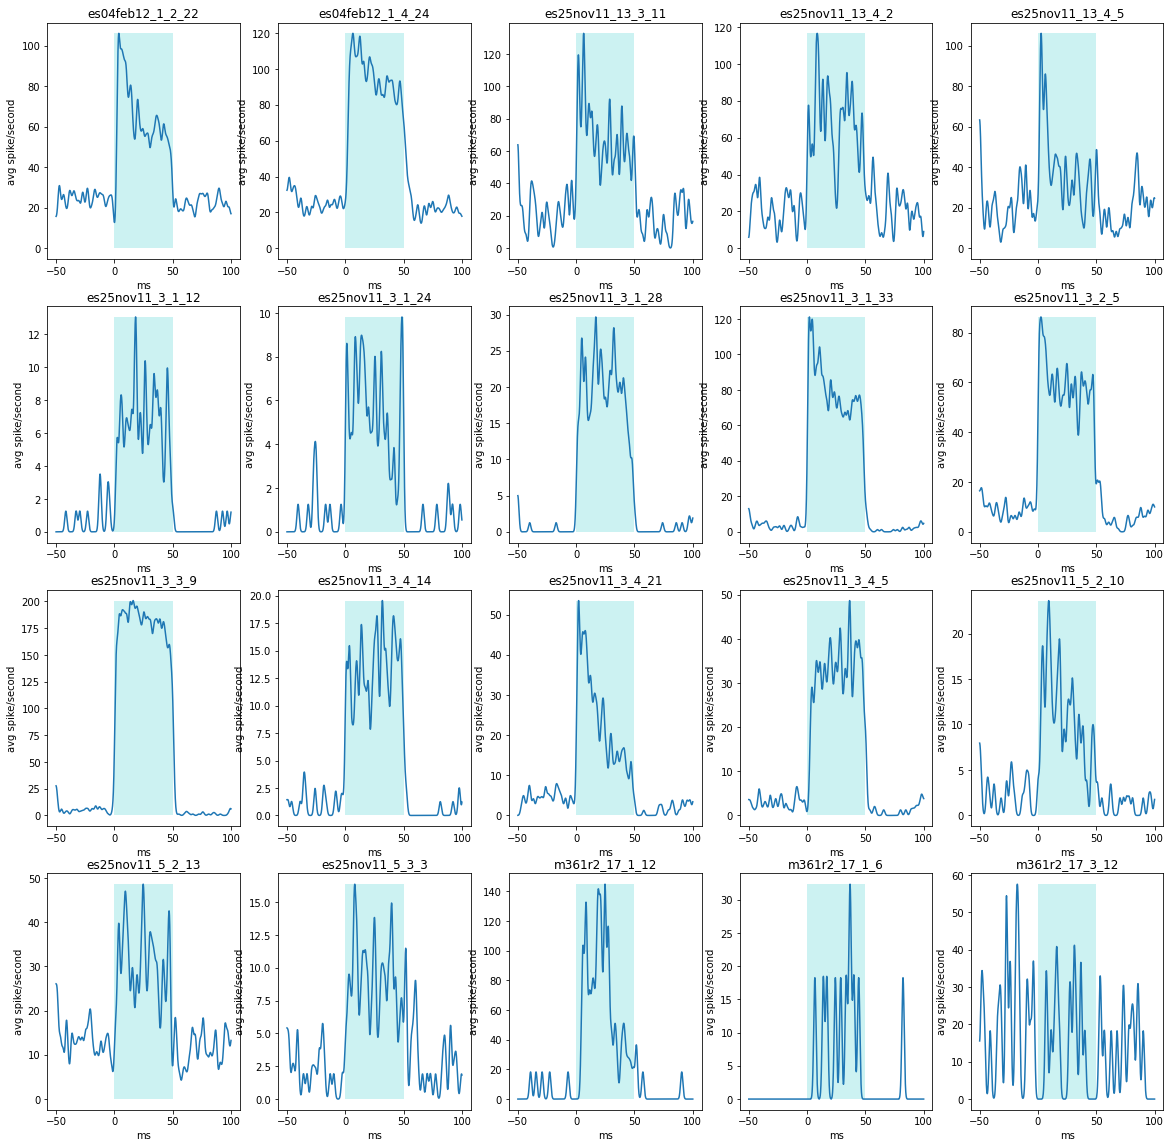

In [10]:
fig, ax = plt.subplots(4, 5, figsize = (20,20))
ax_f = ax.flatten()
loc = 0
for option in pvs:
    for cluster_name in option:
        _ = main('./Data/', cluster_name, './temp_state/', ax_f[loc])
        loc += 1
plt.show()

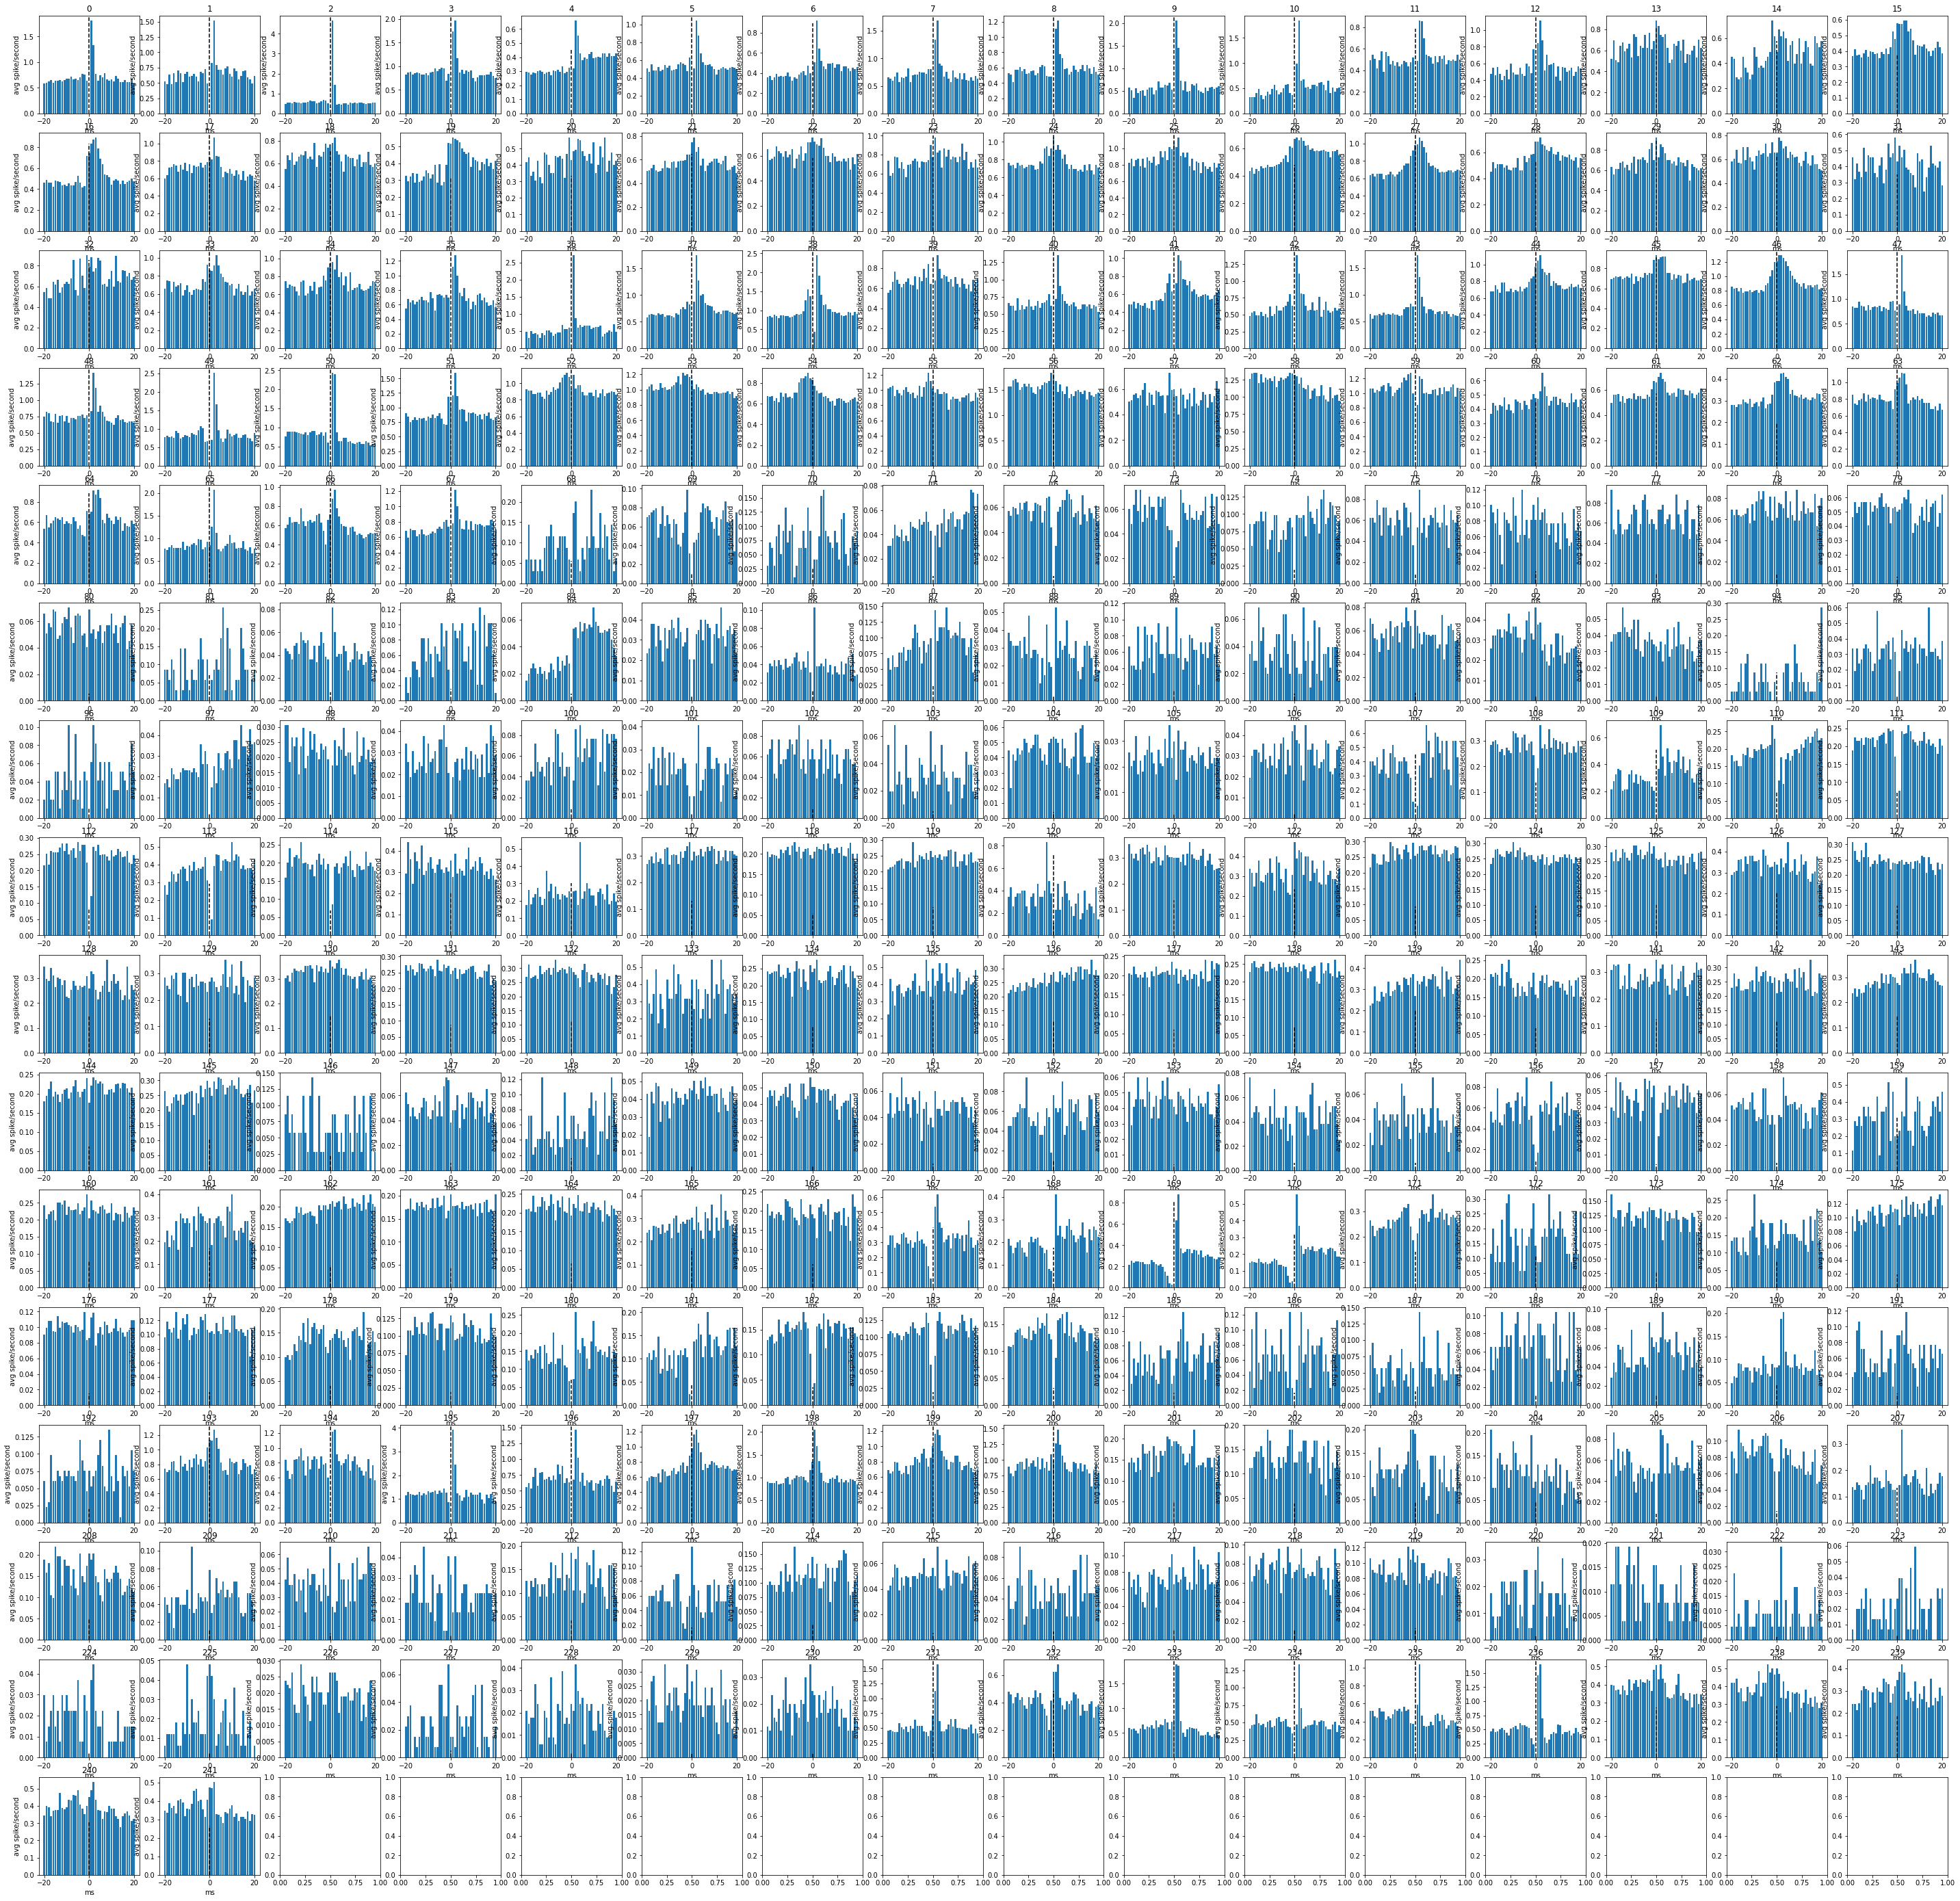

In [11]:
fig, ax = plt.subplots(16, 16, figsize = (50,50))
ax_f = ax.flatten()
loc=0
for option_pv, option_pyr in zip(pvs, pyrs):
    for pv in option_pv:
        for pyr in option_pyr:
            _ = calc_cc(pv, pyr, './temp_state/', ax_f[loc], loc)
            loc += 1
plt.show()
            

In [12]:
loc=0
for option_pv, option_pyr in zip(pvs, pyrs):
    for pv in option_pv:
        for pyr in option_pyr:
            print(f"{loc}: {pv} X {pyr}")
            loc += 1

0: es04feb12_1_2_22 X es04feb12_1_2_12
1: es04feb12_1_2_22 X es04feb12_1_2_13
2: es04feb12_1_2_22 X es04feb12_1_2_16
3: es04feb12_1_2_22 X es04feb12_1_2_2
4: es04feb12_1_2_22 X es04feb12_1_2_21
5: es04feb12_1_2_22 X es04feb12_1_2_23
6: es04feb12_1_2_22 X es04feb12_1_2_24
7: es04feb12_1_2_22 X es04feb12_1_2_25
8: es04feb12_1_2_22 X es04feb12_1_2_4
9: es04feb12_1_2_22 X es04feb12_1_2_5
10: es04feb12_1_2_22 X es04feb12_1_2_6
11: es04feb12_1_2_22 X es04feb12_1_2_8
12: es04feb12_1_2_22 X es04feb12_1_2_9
13: es04feb12_1_2_22 X es04feb12_1_4_10
14: es04feb12_1_2_22 X es04feb12_1_4_12
15: es04feb12_1_2_22 X es04feb12_1_4_13
16: es04feb12_1_2_22 X es04feb12_1_4_17
17: es04feb12_1_2_22 X es04feb12_1_4_19
18: es04feb12_1_2_22 X es04feb12_1_4_2
19: es04feb12_1_2_22 X es04feb12_1_4_20
20: es04feb12_1_2_22 X es04feb12_1_4_3
21: es04feb12_1_2_22 X es04feb12_1_4_9
22: es04feb12_1_4_24 X es04feb12_1_2_12
23: es04feb12_1_4_24 X es04feb12_1_2_13
24: es04feb12_1_4_24 X es04feb12_1_2_16
25: es04feb12_1_4_2